In [1]:
# Import library yang akan digunakan
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import hsv_to_rgb

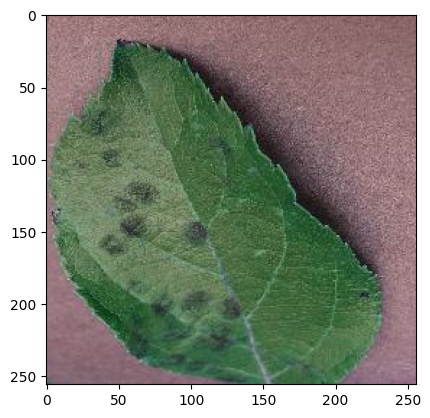

In [2]:
# Untuk import gambar yang akan dideteksi
img = cv2.imread('image_classification/dataset/train/diseased/100.jpg')
plt.imshow(img)
plt.show()

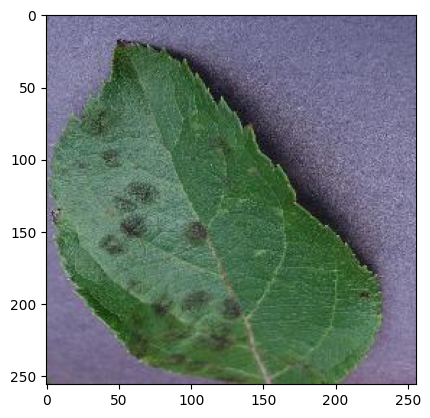

In [3]:
# mengubah warna gambar menjadi non-blue, hanya ada warna merah dan hijau
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

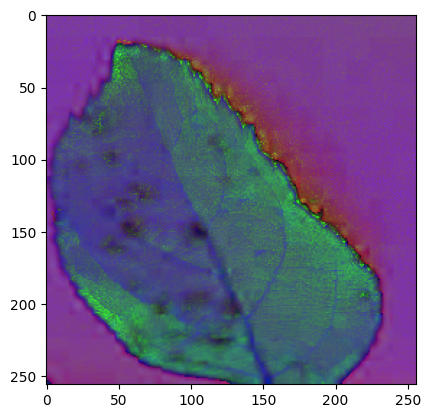

In [4]:
# mengubah gambar menjadi HSV agar bisa tahu shape dari daun pada gambar
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

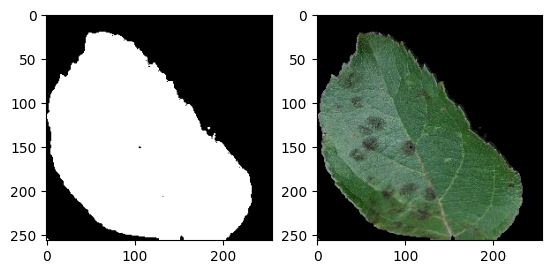

In [5]:
# Untuk ekstrak warna green, agar bisa memisahkan warna daun dan backcground
# warna hijau untuk mendeteksi warna hijau saja pada daun, tidak ada warna lain
lower_green = np.array([25,0,20])
upper_green = np.array([100,255,255])
mask = cv2.inRange(hsv_img, lower_green, upper_green)
result = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

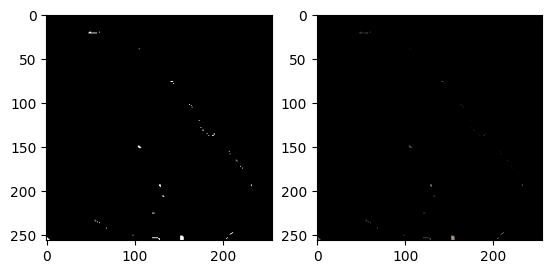

In [6]:
# Untuk eksrtak warna cokelat pada permukaan daun. Ekstraksi antara daun dan background.
# Apabila ada permukaan daun berwarna cokelat, maka ada indikasi daun terkena penyakit.
lower_brown = np.array([10,0,10])
upper_brown = np.array([30,255,255])
disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
disease_result = cv2.bitwise_and(img, img, mask=disease_mask)
plt.subplot(1, 2, 1)
plt.imshow(disease_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(disease_result)
plt.show()

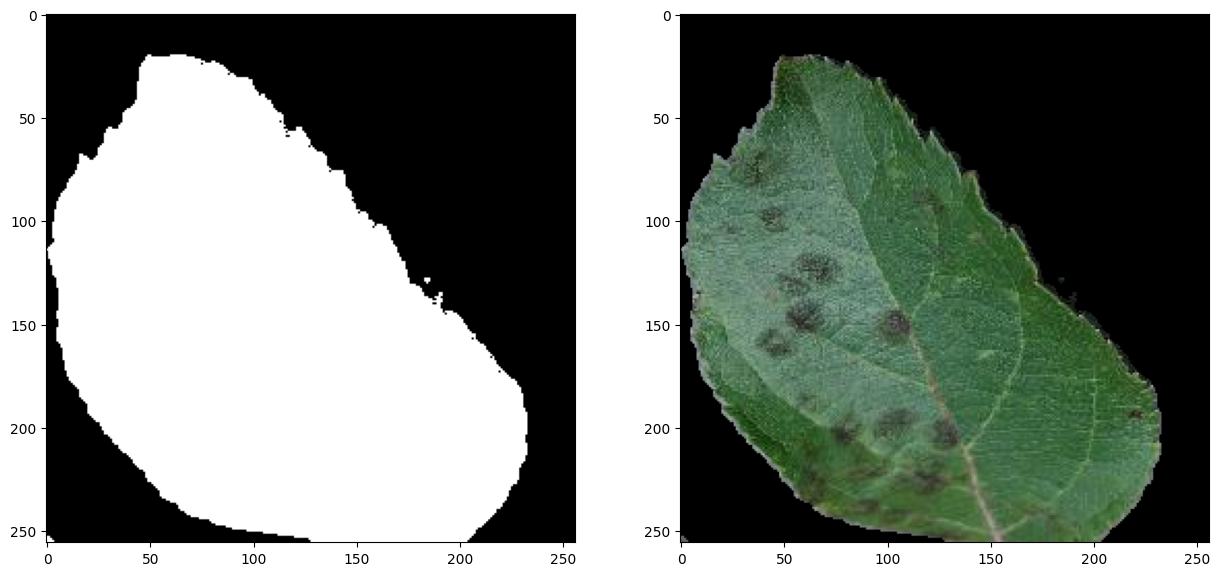

In [7]:
# Setelah di-ekstrak kedua warna, maka digabungkan pada final_mask
# Maka akan makin terlihat bagian permukaan daun yang terkena penyakit sebelah mana
final_mask = mask + disease_mask
final_result = cv2.bitwise_and(img, img, mask=final_mask)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [8]:
# Feature Descripotor

surf = cv2.SIFT_create(400)
# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(final_result,None)
len(kp)

177

In [9]:
print(kp)

(< cv2.KeyPoint 000001A764523B70>, < cv2.KeyPoint 000001A764755DA0>, < cv2.KeyPoint 000001A76478EA60>, < cv2.KeyPoint 000001A76478EA90>, < cv2.KeyPoint 000001A76478EAC0>, < cv2.KeyPoint 000001A76688E4F0>, < cv2.KeyPoint 000001A76688FD80>, < cv2.KeyPoint 000001A76688FEA0>, < cv2.KeyPoint 000001A76688FD20>, < cv2.KeyPoint 000001A76688FF90>, < cv2.KeyPoint 000001A76688F810>, < cv2.KeyPoint 000001A76688FF00>, < cv2.KeyPoint 000001A76688F450>, < cv2.KeyPoint 000001A76688F8A0>, < cv2.KeyPoint 000001A76688E610>, < cv2.KeyPoint 000001A76688FDE0>, < cv2.KeyPoint 000001A76688FED0>, < cv2.KeyPoint 000001A76688FE10>, < cv2.KeyPoint 000001A76688E040>, < cv2.KeyPoint 000001A76688E010>, < cv2.KeyPoint 000001A76688FDB0>, < cv2.KeyPoint 000001A76688E8E0>, < cv2.KeyPoint 000001A76688E790>, < cv2.KeyPoint 000001A76688FD50>, < cv2.KeyPoint 000001A76688DE30>, < cv2.KeyPoint 000001A76688DF50>, < cv2.KeyPoint 000001A76688E550>, < cv2.KeyPoint 000001A76688E940>, < cv2.KeyPoint 000001A76688EAC0>, < cv2.KeyPoin

In [10]:
print(des)

[[ 1.  0.  0. ...  4.  8. 21.]
 [15.  0.  0. ...  9. 32. 13.]
 [62. 12.  0. ... 14.  4.  2.]
 ...
 [11.  2.  2. ...  0.  0.  0.]
 [15.  0.  0. ...  2.  4.  4.]
 [ 4.  0.  0. ... 29.  8.  6.]]


In [11]:
img2 = cv2.drawKeypoints(final_result,kp,None,(255,0,0),4)

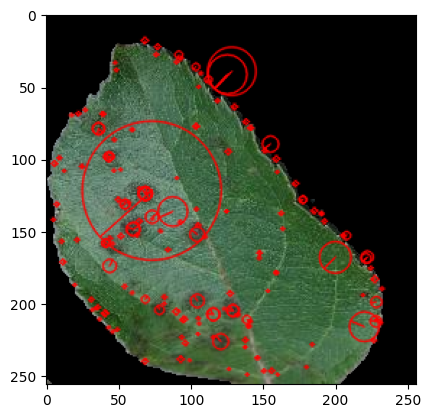

In [12]:
plt.imshow(img2)


In [13]:
# global Feature
global_feature = des

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_feature)

In [15]:
global_feature.shape

(177, 128)

In [16]:
surf.descriptorSize()

128

In [17]:
print("[STATUS] feature vector size {}".format(np.array(global_feature).shape))


[STATUS] feature vector size (177, 128)


In [18]:
a = global_feature
np.savetxt("doo.csv", a, delimiter=",")